### Importing Needed packages

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
import seaborn as sb

%matplotlib inline

Sorry I don't like warnings :(

In [50]:
import warnings
warnings.filterwarnings('ignore')

### Reading the data in

In [5]:
df = pd.read_csv('housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


## Encode Address
Let's encode adress with `LabelEncoder` and create a new column named `AddrEncode` for the values

In [6]:
le = preprocessing.LabelEncoder()
df['AddrEncode'] = le.fit_transform(df['Address'])
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AddrEncode
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67,156
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67,156
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33,117
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33,152
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33,150


### Convert Data Types
We need to consider options like Parking, Warehouse and Elevator. 
So Let's convert those to integer

In [22]:
df['Parking'] = pd.to_numeric(df['Parking'], errors = 'coerce')
df['Parking'] = df['Parking'].astype('int64')
df['Warehouse'] = pd.to_numeric(df['Warehouse'], errors = 'coerce')
df['Warehouse'] = df['Warehouse'].astype('int64')
df['Elevator'] = pd.to_numeric(df['Elevator'], errors = 'coerce')
df['Elevator'] = df['Elevator'].astype('int64')
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AddrEncode
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67,163
3475,83,2,1,1,1,Niavaran,6.800000e+09,226666.67,105
3476,75,2,0,0,0,Parand,3.650000e+08,12166.67,115
3477,105,2,1,1,1,Dorous,5.600000e+09,186666.67,39
3478,82,2,0,1,1,Parand,3.600000e+08,12000.00,115


Now, we need to create a column named `Options` as how many options(Parking, Elevator, Warehouse) it has

In [38]:
df['Options'] = df[['Parking', 'Warehouse', 'Elevator']].sum(axis = 1)
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AddrEncode,Options
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67,163,3
3475,83,2,1,1,1,Niavaran,6.800000e+09,226666.67,105,3
3476,75,2,0,0,0,Parand,3.650000e+08,12166.67,115,0
3477,105,2,1,1,1,Dorous,5.600000e+09,186666.67,39,3
3478,82,2,0,1,1,Parand,3.600000e+08,12000.00,115,2


### Extract main features
Let's extract some features for regression

In [40]:
cdf = df[['Area', 'AddrEncode', 'Options', 'Price', 'Price(USD)']]
cdf.head(10)

,Area,AddrEncode,Options,Price,Price(USD)
0,63,156,3,1.850000e+09,61666.67
1,60,156,3,1.850000e+09,61666.67
2,79,117,3,5.500000e+08,18333.33
3,95,152,3,9.025000e+08,30083.33
4,123,150,3,7.000000e+09,233333.33
5,70,106,2,2.050000e+09,68333.33
6,87,117,3,6.000000e+08,20000.00
7,59,156,3,2.150000e+09,71666.67
8,54,13,2,4.930000e+08,16433.33
9,71,183,3,2.370000e+09,79000.00


### Let's be a data scientist :)
Let's plot Price values with respect to Area and AddrEncode:

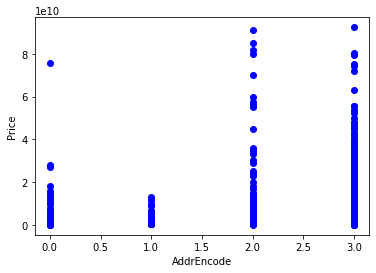

In [44]:
plt.scatter(cdf.Options,cdf.Price,  color='blue')
plt.xlabel("AddrEncode")
plt.ylabel("Price")
plt.show()

### Histogram plots

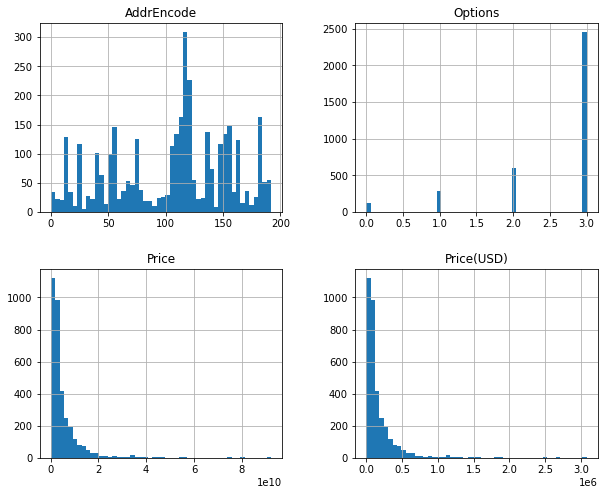

In [43]:
cdf.hist(bins=50, figsize=(10, 8))
plt.show()

## Distribution Plot

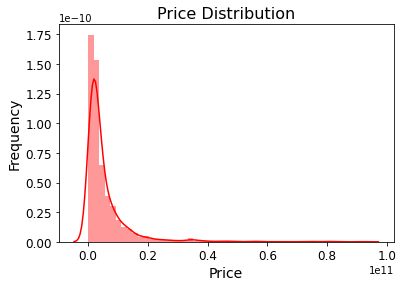

In [53]:

sb.distplot(df['Price'], color = 'r')
plt.title('Price Distribution', fontsize = 16)
plt.xlabel('Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [36]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

https://medium.com/codex/house-price-prediction-with-machine-learning-in-python-cf9df744f7ff